In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC

from scipy.special import expit

### Support Vector Machines

Vista alternativa da Regressão logística

$\Large{h_{\theta}(x) = \frac{1}{1+e^{-z} }, z=\theta^{T}x}$

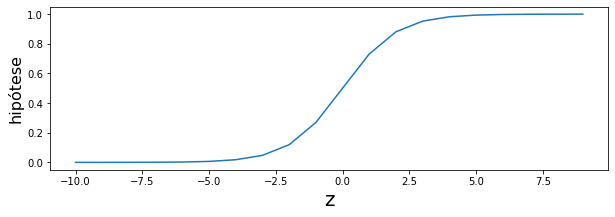

In [23]:
x = np.arange(-10, 10)
y = expit(x)

plt.figure(figsize=(10, 3))

plt.plot(x, y)
plt.xlabel("z", fontsize=20), plt.ylabel("hipótese", fontsize=16);

Se y = 1, nós queremos $\large{h_{\theta}(x)}$ aproximadamente igual a 1, ou seja, $\large{z >> 0}$ 

Se y = 0, nós queremos $\large{h_{\theta}(x)}$ aproximadamente igual a 0, ou seja, $\large{z << 0}$ 

##### Custo da Regressão Logística X Custo da SVM
![](https://camo.githubusercontent.com/e22920c7ba70cb0a5aeefe7edeb0df9c7843b9c04e0e969cd1b0c3462496c3a6/68747470733a2f2f692e696d6775722e636f6d2f4b55654f534b332e706e67)

As linhas retas desenhadas são uma aproximação à função de custo da Regressão Logística, exceto que elas são criadas por 2 segmentos de reta que proporcionam às SVM **vantagem computacionais** e **problema de otimização facilitado**

### LR
$$\Large{J(\theta) = \frac{-1}{m} [\sum_{i=1}^{m} (y^{(i)}*log(h_{\theta})) + ((1-y^{(i)})*log(1-h_{\theta}))] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta^2}$$

### SVM
$$\Large{J(\theta) = C*\sum_{i=1}^{m}[y^{(i)} cost_1(z) + (1-y^{(i)}) cost_0(z)] + \frac{1}{2} \sum_{j=1}^{n} \theta^2}$$

$$\Large{C = \frac{1}{\lambda}}$$

### Intuição da Large Margin do SVM**

### Kernels
Solução para adaptar as SVMs a desenvolverem classificadores não-lineares

In [55]:
X, y = datasets.make_moons(n_samples=100, noise=0.15)

In [69]:
px.scatter(x=X[:, 0], y=X[:, 1], color=pd.Series(y).astype("object"))

In [71]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [72]:
svm_clf.predict([[0, .2]])

array([0], dtype=int64)

In [75]:
svm_nn_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("rbf_svc", SVC(kernel="rbf")),
])

svm_nn_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('rbf_svc', SVC())])

In [76]:
svm_nn_clf.predict([[0, .2]])

array([1], dtype=int64)

#### Hiperparametros
- **kernel**: "linear", "poly", "rbf" (gaussiano), "precomputed",
- **C**: Quanto maior o C, menos a regularização. Ou seja, mais chances de overfitting.
- **gamma**: Define qual distante é a influência dos exemplos de treino. Low values: Decision Boundary menos curvilínea. High values: mais curvilínea (favorecendo overfitting).

#### Logistic Regression vs Support Vector Machines
- Se **n** for maior em relação a **m** $n > m; n = 10,000; m = 10-1,000$
        LR  ou SVM sem Kernel (SVM linear)
    
- Se **n** é pequeno e **m** é "mais ou menos" $n = 1-1,000; m=10,000"$
        SVM com Kernel Gaussiano (~rbf)
    
- Se **n** é pequeno e **m** é muito grande $m >> n; n = 1-1,000; m=100,000$
        Criar ou adicionar mais features e, então, usar LR ou SVM sem Kernel (SVM Linear)

#### Forças
- Funciona bem quando existe uma margem clara entre as classes

#### Fraquezas
- Não desempenha tão bem em datasets muito largos, pois o tempo de treino é o cubo do tamanho do dataset O(n³). Sugestão: conjunto de treino menor.
- Não funciona tão bem quando existem muitos ruídos, quando as classes costumam se sobrepor muito.